In [101]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [102]:
df=pd.read_csv("../../Bigdata Files/WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [103]:
df.quality.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [104]:
cm=sns.light_palette("teal",as_cmap=True)
df.head().style.background_gradient(cmap=cm)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5,0
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5,1
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5,2
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6,3
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5,4


In [105]:
cm=sns.light_palette("#0067aa",as_cmap=True)
df.tail().style.background_gradient(cmap=cm)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.300000,0.510000,0.130000,2.300000,0.076000,29.000000,40.000000,0.995740,3.420000,0.750000,11.000000,6,1592
1139,6.800000,0.620000,0.080000,1.900000,0.068000,28.000000,38.000000,0.996510,3.420000,0.820000,9.500000,6,1593
1140,6.200000,0.600000,0.080000,2.000000,0.090000,32.000000,44.000000,0.994900,3.450000,0.580000,10.500000,5,1594
1141,5.900000,0.550000,0.100000,2.200000,0.062000,39.000000,51.000000,0.995120,3.520000,0.760000,11.200000,6,1595
1142,5.900000,0.645000,0.120000,2.000000,0.075000,32.000000,44.000000,0.995470,3.570000,0.710000,10.200000,5,1597


In [106]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [107]:
cm=sns.light_palette("#197278",as_cmap=True)
df.describe().transpose().style.background_gradient(cmap=cm)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.000000,8.311111,1.747595,4.600000,7.100000,7.900000,9.100000,15.900000
volatile acidity,1143.000000,0.531339,0.179633,0.120000,0.392500,0.520000,0.640000,1.580000
citric acid,1143.000000,0.268364,0.196686,0.000000,0.090000,0.250000,0.420000,1.000000
residual sugar,1143.000000,2.532152,1.355917,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1143.000000,0.086933,0.047267,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1143.000000,15.615486,10.250486,1.000000,7.000000,13.000000,21.000000,68.000000
total sulfur dioxide,1143.000000,45.914698,32.782130,6.000000,21.000000,37.000000,61.000000,289.000000
density,1143.000000,0.996730,0.001925,0.990070,0.995570,0.996680,0.997845,1.003690
pH,1143.000000,3.311015,0.156664,2.740000,3.205000,3.310000,3.400000,4.010000
sulphates,1143.000000,0.657708,0.170399,0.330000,0.550000,0.620000,0.730000,2.000000


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [109]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [110]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

<Axes: >

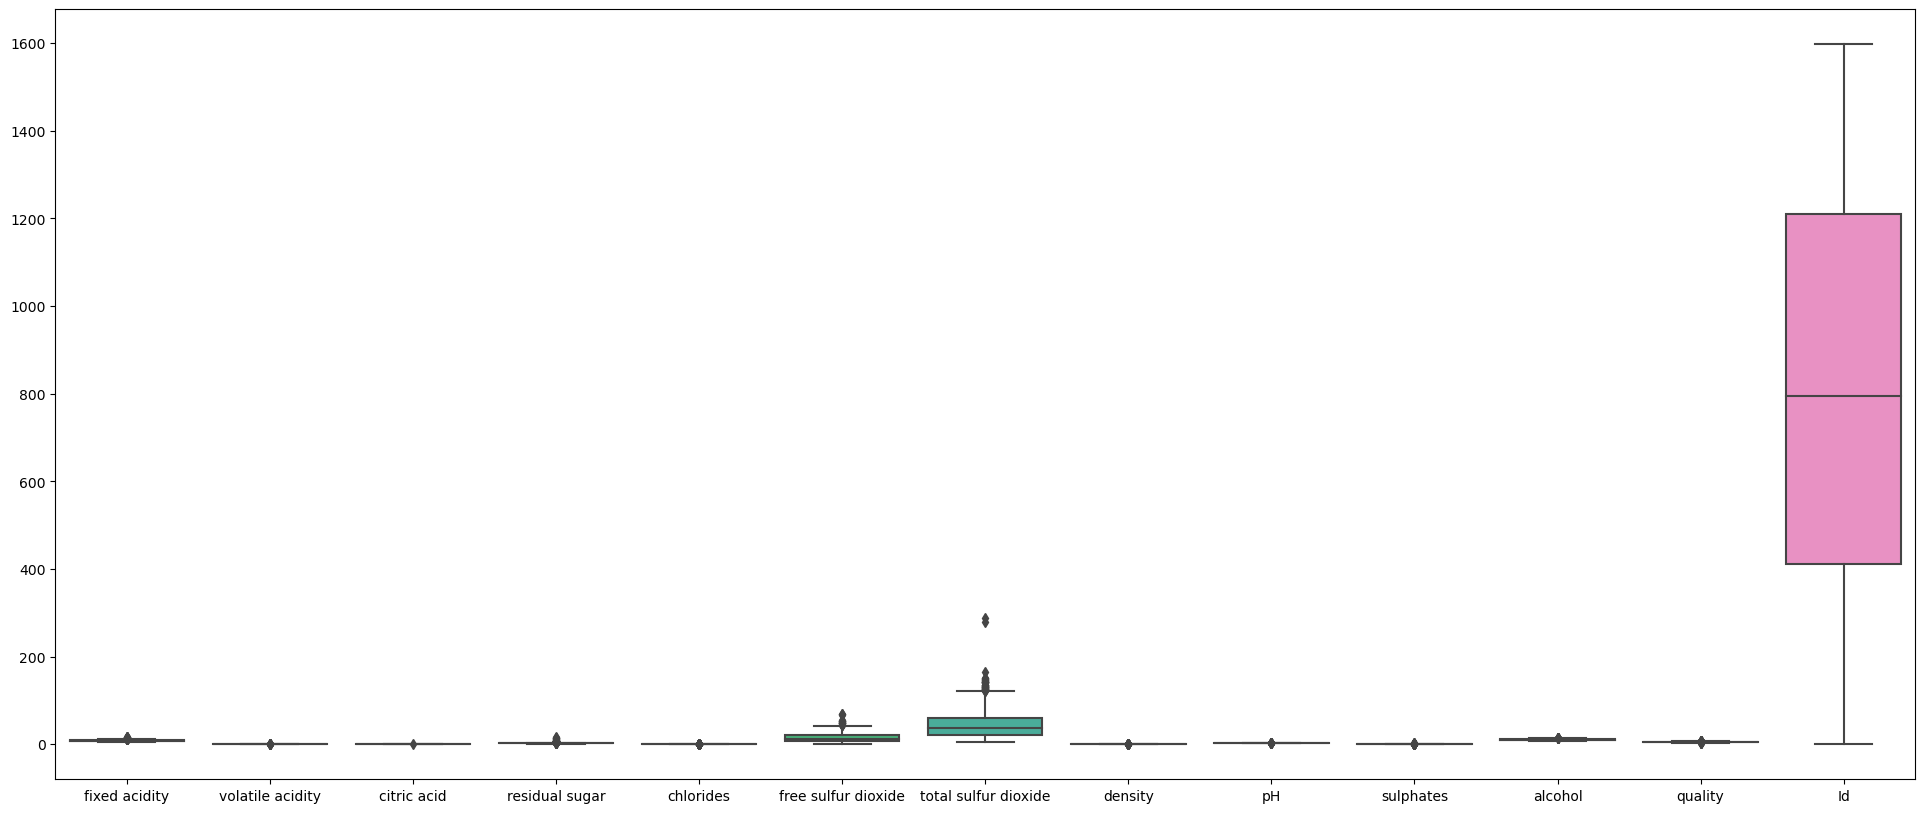

In [111]:
plt.figure(figsize=(24,10))
sns.boxplot(df)

In [112]:
X=df.drop(["Id","quality"],axis=1).values

In [113]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.2  ,  0.6  ,  0.08 , ...,  3.45 ,  0.58 , 10.5  ],
       [ 5.9  ,  0.55 ,  0.1  , ...,  3.52 ,  0.76 , 11.2  ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ]])

In [114]:
X.shape

(1143, 11)

In [115]:
y=df["quality"].values

In [116]:
y.shape

(1143,)

In [117]:
y

array([5, 5, 5, ..., 5, 6, 5])

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [130]:
knn=KNeighborsClassifier(n_neighbors=9)
nb=GaussianNB()
svm=SVC()
models=[knn,nb,svm]
for i in models:
    print(i)
    i.fit(X_train,y_train)
    y_pred=i.predict(X_test)
    print(classification_report(y_test,y_pred,zero_division=0))    
    print()

KNeighborsClassifier(n_neighbors=9)
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.57      0.73      0.64       143
           6       0.53      0.48      0.51       146
           7       0.55      0.39      0.46        41
           8       0.00      0.00      0.00         4

    accuracy                           0.55       343
   macro avg       0.33      0.32      0.32       343
weighted avg       0.53      0.55      0.54       343


GaussianNB()
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         9
           5       0.67      0.53      0.59       143
           6       0.56      0.57      0.56       146
           7       0.43      0.66      0.52        41
           8       0.00      0.00      0.00         4

    accuracy                           0.54       343
   macro avg       0.28    

In [124]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

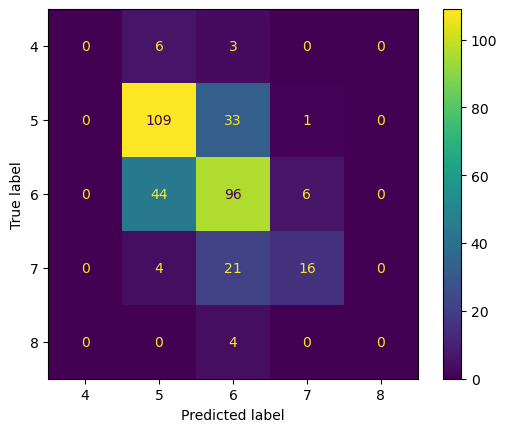

In [125]:
labels=['4','5','6','7','8']
result=confusion_matrix(y_test,y_pred)
# score=accuracy_score(y_test,y_pred)
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()